In [359]:
import numpy as np
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


coded_data = pd.read_csv("./coded_responses.csv")
#coded_data.dropna(how="any", inplace=True, axis=1)

In [360]:
coded_data.head()

,question,respondent_id,response,theme
0,Why are you cancelling?,1779533,seen what I like already,NaN
1,Why are you cancelling?,1779397,"You keep canceling really good, popular series!",NaN
2,Why are you cancelling?,1779811,Getting through cell provider,NaN
3,Why are you cancelling?,1779968,Budget cuts,Reducing expenses / financial constraints
4,Why are you cancelling?,1779967,Cannot have multiple users,Object to sharing restrictions


In [361]:
coded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question       663 non-null    object
 1   respondent_id  663 non-null    int64 
 2   response       663 non-null    object
 3   theme          635 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.8+ KB


In [362]:
coded_data.shape

(663, 4)

In [363]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [364]:
missing_value(coded_data).style.background_gradient(cmap='coolwarm').set_precision(2)

,Missing Number,Missing Percentage
theme,28,4.22


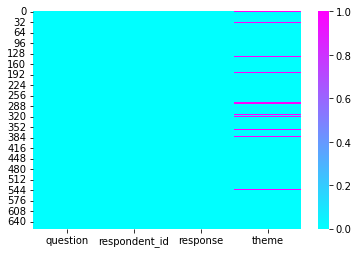

In [365]:
sns.heatmap(coded_data.isnull(),cmap='cool')

### Theme column has 4.2 % missing data. dropping them and proceeding for further analysis.

In [366]:
coded_data.dropna(how="any", inplace=True, axis=0)

In [367]:
coded_data.head()

,question,respondent_id,response,theme
3,Why are you cancelling?,1779968,Budget cuts,Reducing expenses / financial constraints
4,Why are you cancelling?,1779967,Cannot have multiple users,Object to sharing restrictions
5,Why are you cancelling?,1779966,cost has risen too much too quickly,Constant price rise / increase
6,Why are you cancelling?,1779965,disappointed with the sub subscription news,New policy generally
7,Why are you cancelling?,1779964,Don't want it for now anymore,Don't use it enough / anymore


In [368]:
coded_data['theme'].value_counts()

Constant price rise / increase                     153
Reducing expenses / financial constraints          101
Consolidating / shifting accounts                   62
Temporary break from platform                       52
Too expensive                                       46
Don't use it enough / anymore                       34
Corporate greed / taking advantage of customers     30
Moving / changing locations                         23
Object to sharing restrictions                      23
Prefer competition                                  17
Object to family/household restriction              17
Account owner passed away                           16
Account gets hacked                                 15
Unemployed                                          14
Object to additional charges                        12
New policy generally                                 8
Making changes to payment / billing                  6
Problems with billing                                6
Name: them

In [369]:
coded_data['theme'].value_counts().count()

18

In [370]:
# text preprocessing
import re
def process_response(resp):
    resp = re.sub("\'", "", resp) 
    # remove everything except alphabets 
    resp = re.sub("[^a-zA-Z]"," ",resp) 
    # remove whitespaces 
    resp = ' '.join(resp.split()) 
    # convert text to lowercase 
    resp = resp.lower() 
    
    return resp

In [371]:
coded_data['clean_response'] = coded_data['response'].apply(lambda x: process_response(x))

In [372]:
coded_data.head()

,question,respondent_id,response,theme,clean_response
3,Why are you cancelling?,1779968,Budget cuts,Reducing expenses / financial constraints,budget cuts
4,Why are you cancelling?,1779967,Cannot have multiple users,Object to sharing restrictions,cannot have multiple users
5,Why are you cancelling?,1779966,cost has risen too much too quickly,Constant price rise / increase,cost has risen too much too quickly
6,Why are you cancelling?,1779965,disappointed with the sub subscription news,New policy generally,disappointed with the sub subscription news
7,Why are you cancelling?,1779964,Don't want it for now anymore,Don't use it enough / anymore,dont want it for now anymore


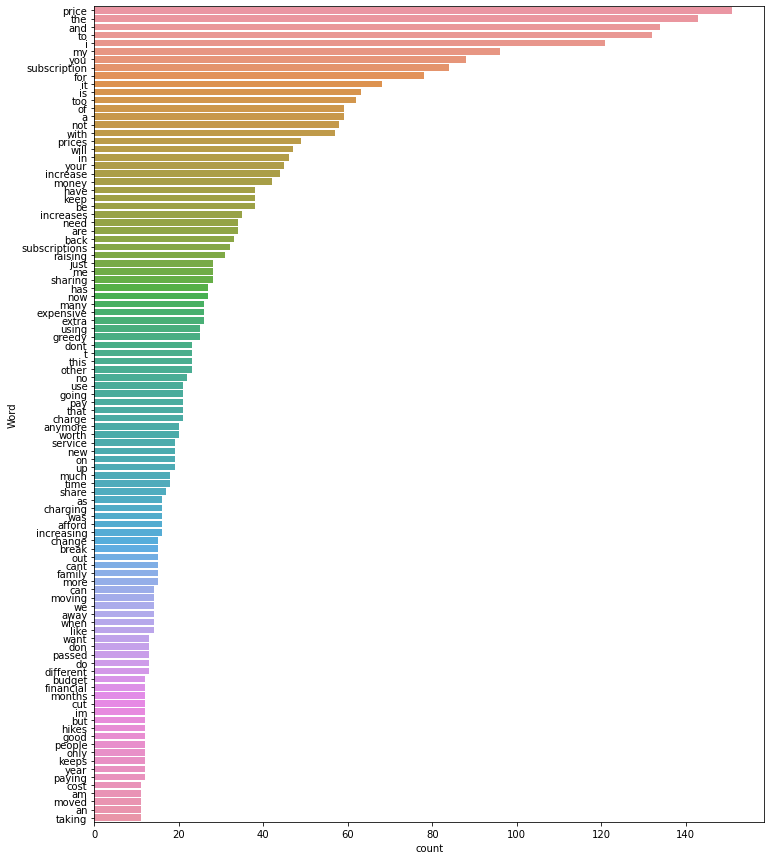

In [373]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 

    # selecting top 30 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 

    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  
# print 100 most frequent words 
freq_words(coded_data['clean_response'], 100)

In [374]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string

def remove_stopwords(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') 
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # remove numbers
    text_nopunc_nonum = re.sub(r'\d+', '', nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in text_nopunc_nonum.split() if word.lower() not in STOPWORDS and len(word)>2 ])


coded_data['clean_response'] = coded_data['clean_response'].apply(lambda x: remove_stopwords(x))

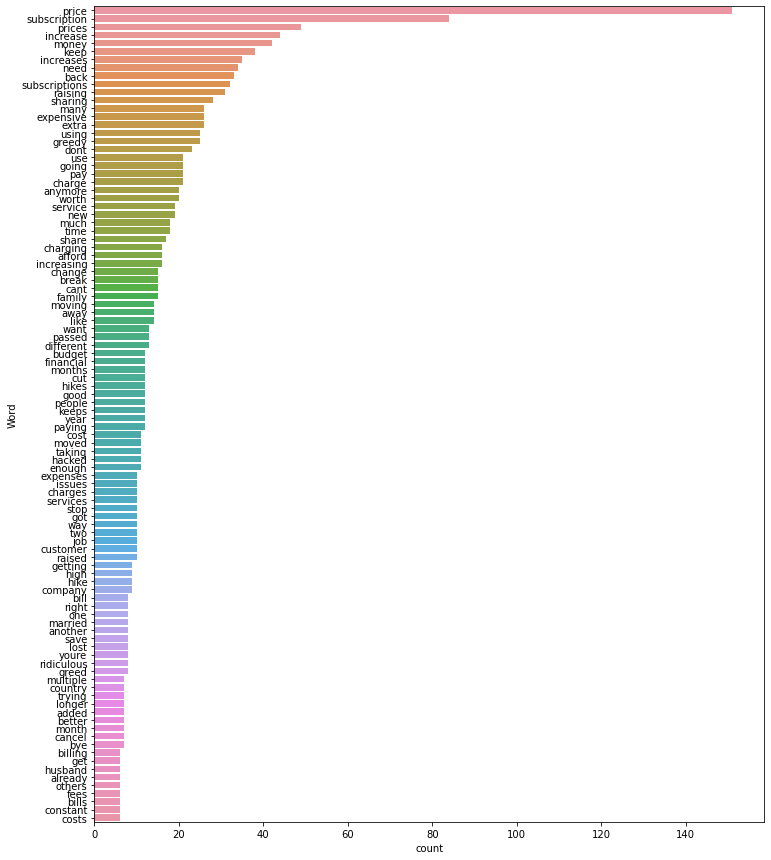

In [375]:
freq_words(coded_data['clean_response'], 100)

In [376]:
###Converting Text to Features

####we will treat this multi-label classification problem as a Binary Relevance problem. Hence, we will now one hot encode the target variable, i.e., theme by using sklearn’s MultiLabelBinarizer( ). Since there are 18  unique themes, there are going to be 18 new target variables.

In [377]:
## remove question 	respondent_id respondent id , group response and make theme as list

In [378]:
coded_data2 = coded_data.drop(['question','respondent_id','response'], 1)[['clean_response', 'theme']]
coded_data2

,clean_response,theme
3,budget cuts,Reducing expenses / financial constraints
4,cannot multiple users,Object to sharing restrictions
5,cost risen much quickly,Constant price rise / increase
6,disappointed sub subscription news,New policy generally
7,dont want anymore,Don't use it enough / anymore
...,...,...
658,pricing terrible keep increasing prices additi...,Constant price rise / increase
659,profits youre raising price kidding,Constant price rise / increase
660,rates higher others thing,Prefer competition
661,rates higher others thing,Too expensive


In [379]:
coded_data2[coded_data2['clean_response']=='rates higher others thing']

,clean_response,theme
660,rates higher others thing,Prefer competition
661,rates higher others thing,Too expensive


In [301]:
coded_data2 = coded_data2['theme'].groupby([coded_data2.clean_response]).apply(list).reset_index()
coded_data2['theme'] = coded_data2['theme'].apply(set).apply(list)

In [380]:
coded_data2[coded_data2['clean_response']=='rates higher others thing']

,clean_response,theme
660,rates higher others thing,Prefer competition
661,rates higher others thing,Too expensive


In [441]:
coded_data2['theme_pre'] = [''.join(i) for i in coded_data['theme']]
coded_data2.head()

,clean_response,theme,theme_pre,theme_encoded
3,budget cuts,Reducing expenses / financial constraints,Reducing expenses / financial constraints,14
4,cannot multiple users,Object to sharing restrictions,Object to sharing restrictions,11
5,cost risen much quickly,Constant price rise / increase,Constant price rise / increase,3
6,disappointed sub subscription news,New policy generally,New policy generally,8
7,dont want anymore,Don't use it enough / anymore,Don't use it enough / anymore,5


* converting the string labels to numerical values for modeling

In [442]:
coded_data2[['clean_response', 'theme_pre']].nunique()

clean_response    514
theme_pre          18
dtype: int64

In [443]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
coded_data2['theme_encoded'] = le.fit_transform(coded_data2['theme_pre'])

* using tfidf vectorizer to transform the response text to vectorized format

In [444]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

* splitting the data into train and test set

In [445]:
X_train, X_test, y_train, y_test = train_test_split(coded_data2['clean_response'], coded_data2['theme_encoded'], 
                                              test_size=0.2, random_state=9)

In [446]:
# create TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [447]:
from sklearn.linear_model import LogisticRegression

# Performance metric
from sklearn.metrics import f1_score

In [448]:
lr = LogisticRegression()

# fit model on train data
lr.fit(X_train_tfidf, y_train)

# make predictions for validation set
y_pred = lr.predict(X_test_tfidf)

In [449]:
y_pred[3]

3

In [450]:
# evaluate performance
f1_score(y_test, y_pred, average="micro")

0.6141732283464567

In [451]:
y_pred

array([ 0,  3, 15,  3,  3,  3, 15,  3,  3,  3,  1, 15,  3,  1,  3,  3, 14,
       16, 15, 14,  3,  2, 14, 14,  3, 14,  3,  2, 14, 14, 14, 14,  3, 14,
       11,  3, 14,  5,  0,  3,  3,  3, 14,  2, 15,  3,  2,  3, 16,  3,  9,
       16, 17,  3,  3,  3,  3,  3,  3,  2, 15, 15,  3,  3,  3,  2, 14, 14,
       14,  3,  2, 14,  2,  3,  4, 14,  3,  3,  3, 14,  3, 14,  3,  3,  2,
        2, 16,  3,  2,  3, 14,  3,  5,  0,  3, 15, 14, 15,  3,  2,  3,  2,
        2,  2,  3,  3,  3, 14,  3,  3,  4, 14,  3,  2,  2,  3,  3, 14,  1,
        3,  2, 14,  2,  5, 14,  3,  3])

In [456]:
for j, i in enumerate(X_test.index): 
    print("Response: ", X_test.iloc[j], "\nPredicted theme: ", le.inverse_transform(y_pred)[j]), 
    print("Actual theme: ", le.inverse_transform(y_test)[j], "\n")

Response:  got hacked 
Predicted theme:  Account gets hacked
Actual theme:  Account gets hacked 

Response:  change payment date 
Predicted theme:  Constant price rise / increase
Actual theme:  Making changes to payment / billing 

Response:  summer break 
Predicted theme:  Temporary break from platform
Actual theme:  Temporary break from platform 

Response:  longer enough value justify cost 
Predicted theme:  Constant price rise / increase
Actual theme:  Too expensive 

Response:  keep upping prices huge amounts 
Predicted theme:  Constant price rise / increase
Actual theme:  Constant price rise / increase 

Response:  using different membership 
Predicted theme:  Constant price rise / increase
Actual theme:  Prefer competition 

Response:  back 
Predicted theme:  Temporary break from platform
Actual theme:  Temporary break from platform 

Response:  ridiculous price gouging 
Predicted theme:  Constant price rise / increase
Actual theme:  Too expensive 

Response:  cost way tooo much

# clustering

In [350]:
response_tfidf = tfidf_vectorizer.fit_transform(coded_data['clean_response'])

In [352]:
from sklearn.cluster import k_means
kmeans = k_means(response_tfidf.toarray(), n_clusters=3)

coded_data['label'] = kmeans[1]

coded_data[['label']].value_counts()

label
0        355
1         98
2         61
dtype: int64

In [356]:
coded_data[['clean_response', 'label']]

,clean_response,label
0,added charges fees,0
1,afford,0
2,afford anymore thanks inflation caused preside...,0
3,afford right,0
4,afford think price way high willing pay,1
...,...,...
509,work moment,0
510,worth price increase,1
511,youre going allow family sharing,0
512,youre greedy cared wouldnt keep hiking prices ...,0


# Topic modelling

In [462]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
doc_term_matrix = count_vect.fit_transform(coded_data['clean_response'].values.astype('U'))

lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
lda.fit(doc_term_matrix)


# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic {}::".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)

n_top_words = 10
print("\nTopics in LDA model: ")
count_feature_names = count_vect.get_feature_names()
print_top_words(lda, count_feature_names, n_top_words)


Topics in LDA model: 

Topic 0::money subscriptions need expensive subscription dont moving financial moved budget

Topic 1::price increase increases keep greedy prices raising many increasing pay

Topic 2::subscription use hacked service many job expensive access added charges

Topic 3::subscription back sharing using prices charge extra break away passed

Topic 4::cost time others company higher much rates thing death needed


In [463]:
# part 2

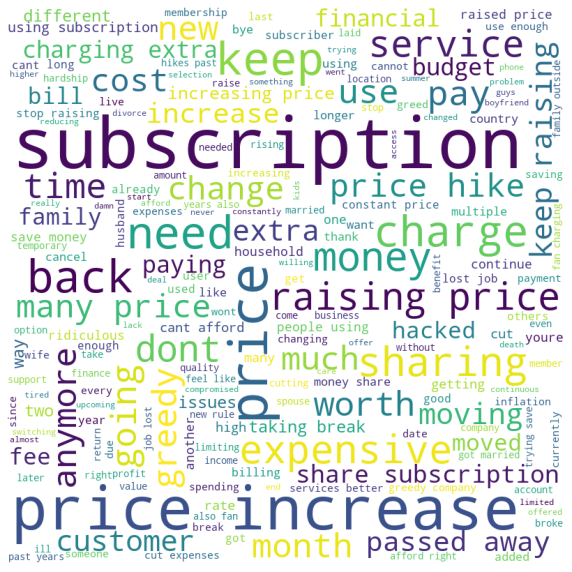

In [475]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

#filter the df to one candidate, and create a list of responses from them
text1 = coded_data.clean_response.tolist() 

# join the list and lowercase all the words
text = ' '.join(text1).lower() 


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words("english")),
                min_font_size = 10).generate(text)

plt.figure(figsize = (10, 15), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
  
plt.show()

## N-grams

In [476]:
# Function to calculate ngrams
def extract_ngrams(data, num):
  # Taking ngrams on Description column text and taking the value counts of each of the tokens
  words_with_count  = nltk.FreqDist(nltk.ngrams(data, num)).most_common(30) # taking top 30 most common words

  # Creating the dataframe the words and thier counts
  words_with_count = pd.DataFrame(words_with_count, columns=['Words', 'Count'])

  # Removing the brackets and commans
  words_with_count.Words = [' '.join(i) for i in words_with_count.Words]

  # words_with_count.index = [' '.join(i) for i in words_with_count.Words]
  words_with_count.set_index('Words', inplace=True) # setting the Words as index

  # Returns the dataframe which contains unique tokens ordered by their counts 
  return words_with_count

In [481]:
# Uni-Grams
uni_grams = extract_ngrams(text.split(), 1)

# Printing top words with their counts
uni_grams[0:10]

,Count
Words,
price,151
subscription,84
prices,49
increase,44
money,42
keep,38
increases,35
need,34
back,33


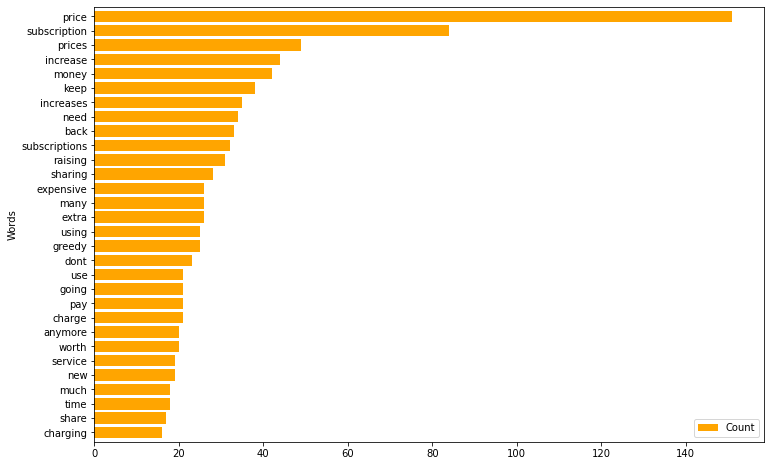

In [482]:
# Visualising the ngrams
uni_grams.sort_values(by='Count').plot.barh(color = 'orange', width = 0.8, figsize = (12,8));

In [484]:
# Bi-Grams
bi_grams = extract_ngrams(text.split(), 2)

# Printing the words with their counts
bi_grams[0:10]

,Count
Words,
price increases,34
price increase,32
raising prices,18
many price,17
keep raising,15
passed away,13
price hikes,12
charging extra,12
taking break,10


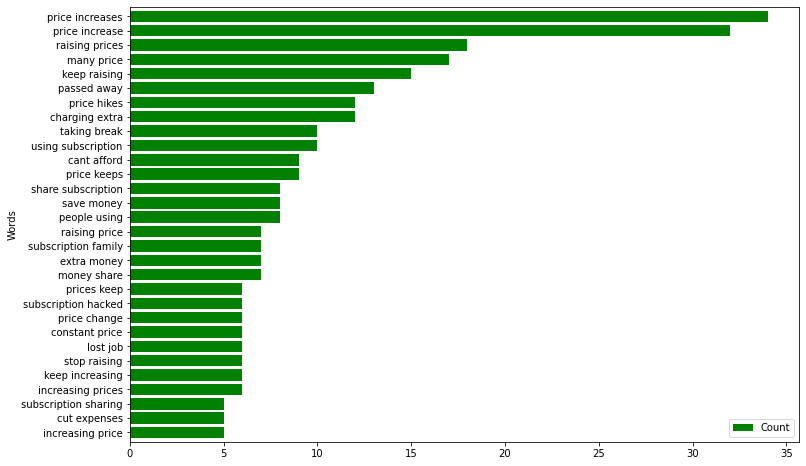

In [485]:
bi_grams.sort_values(by='Count').plot.barh(color = 'green', width = 0.8, figsize = (12,8));


In [486]:
# tri-Grams
tri_grams = extract_ngrams(text.split(), 3)

# Printing the words with their counts
tri_grams[0:10]

,Count
Words,
keep raising prices,7
extra money share,7
many price hikes,7
many price increases,7
keep raising price,6
constant price increases,5
worth price increase,5
stop raising prices,5
share subscription family,5


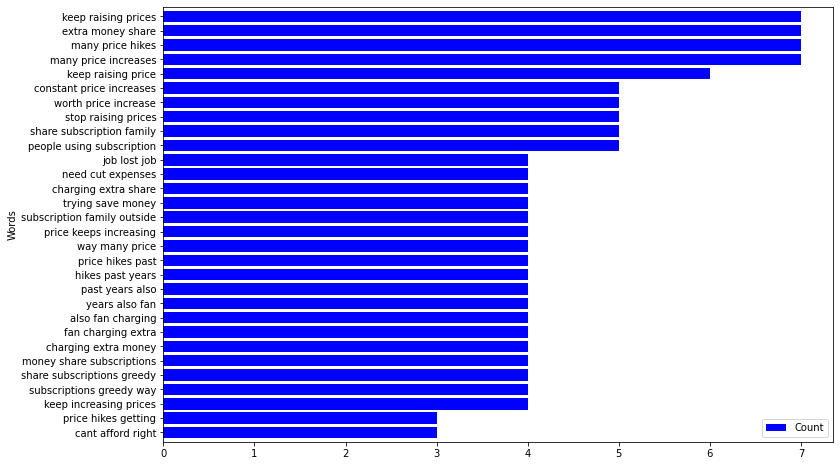

In [487]:
tri_grams.sort_values(by='Count').plot.barh(color = 'blue', width = 0.8, figsize = (12,8));


In [489]:
coded_data['theme'].value_counts()

Constant price rise / increase                     153
Reducing expenses / financial constraints          101
Consolidating / shifting accounts                   62
Temporary break from platform                       52
Too expensive                                       46
Don't use it enough / anymore                       34
Corporate greed / taking advantage of customers     30
Moving / changing locations                         23
Object to sharing restrictions                      23
Prefer competition                                  17
Object to family/household restriction              17
Account owner passed away                           16
Account gets hacked                                 15
Unemployed                                          14
Object to additional charges                        12
New policy generally                                 8
Making changes to payment / billing                  6
Problems with billing                                6
Name: them

In [502]:
# taking top 2 themes and analysing
# #Ngram with theme column


In [509]:

# Dividing the tokens with respect to Industry Sector from the description text
tokens_1 = ' '.join(coded_data[coded_data.theme=='Constant price rise / increase']['clean_response']).split()
tokens_2 = ' '.join(coded_data[coded_data.theme =='Reducing expenses / financial constraints']['clean_response']).split()


print('Total number of words in First theme:', len(tokens_1))
print('Total number of words in Second theme:',len(tokens_2))


# Extracting unigrams on metals category
unigrams_theme_1 = extract_ngrams(tokens_1, 1).reset_index()

# Extracting unigrams on mining category
unigrams_theme_2 = extract_ngrams(tokens_2, 1).reset_index()

unigrams_theme_1.join(unigrams_theme_2, lsuffix='_Metals', rsuffix='_Mining').head(10)

Total number of words in First theme: 813
Total number of words in Second theme: 292


,Words_Metals,Count_Metals,Words_Mining,Count_Mining
0,price,108,money,15
1,increase,34,cut,12
2,prices,32,financial,11
3,increases,29,afford,11
4,keep,26,budget,10
5,raising,25,need,9
6,increasing,11,expenses,9
7,subscription,11,back,8
8,much,10,trying,7
9,going,10,save,7


* Above are the top 10 words in the themes taken